# **Logistic Regression for HR Analytics**

###### **Connect the Google Drive**

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### **Import Libraries**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

###### **Load the Dataset**

In [97]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/turnover.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


###### **Dataset Preview**

In [99]:
df.shape

(14999, 10)

In [100]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


###### **Exploratory Data Analysis (EDA)**

###### **Distribution of Numerical Features**

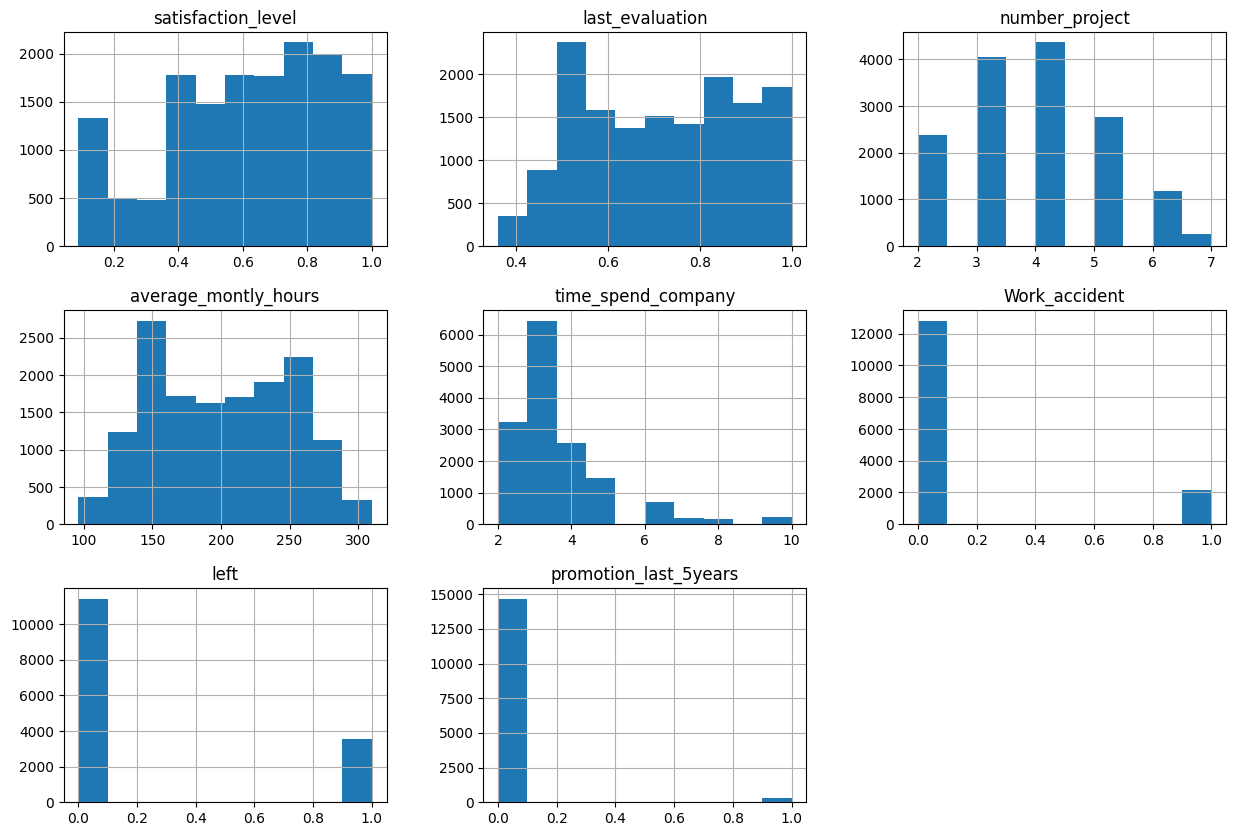

In [102]:
df.hist(figsize=(15,10))
plt.show()


###### **Department-wise Employee Distribution**

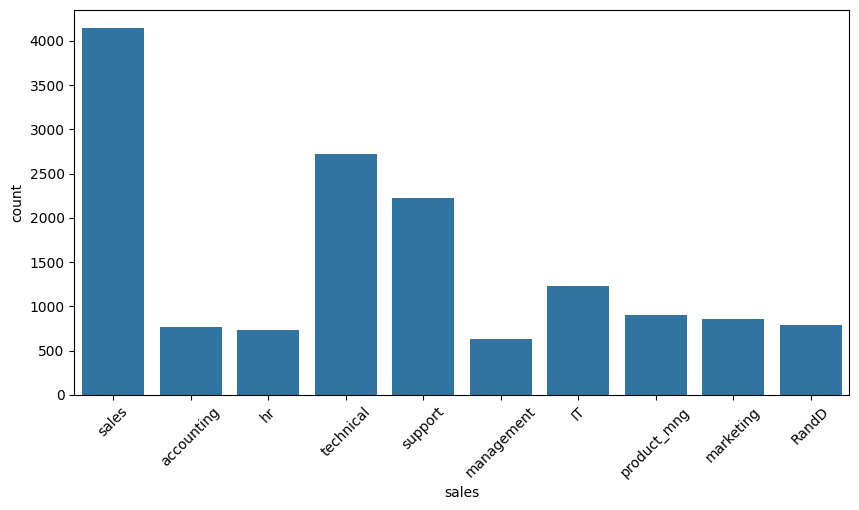

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x='sales', data=df)
plt.xticks(rotation=45)
plt.show()


###### **Salary-wise Employee Distribution**

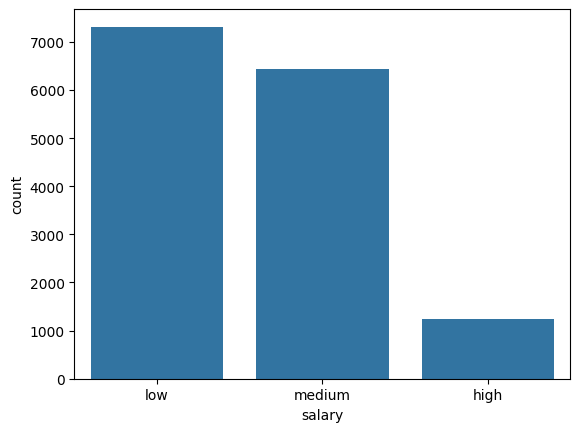

In [104]:
sns.countplot(x='salary', data=df)
plt.show()

###### **Correlation Analysis**

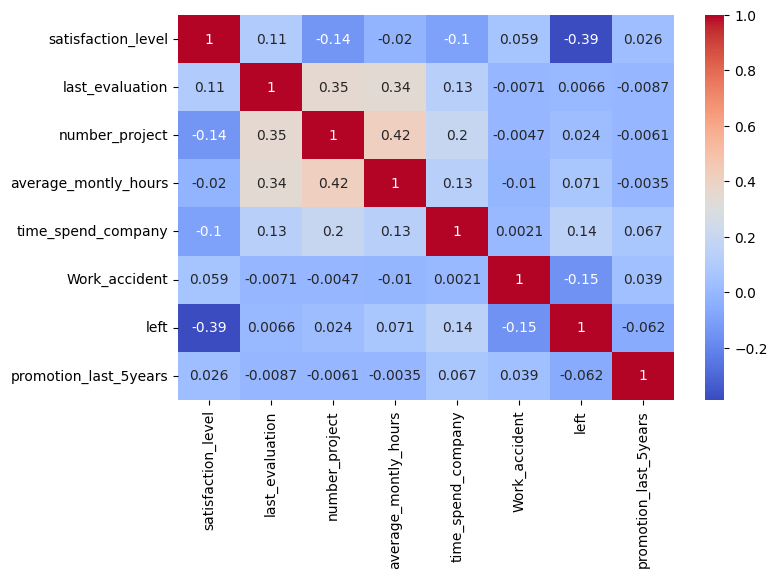

In [105]:
plt.figure(figsize=(8,5))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


###### **Relationship Between Satisfaction Level and Other Factors**

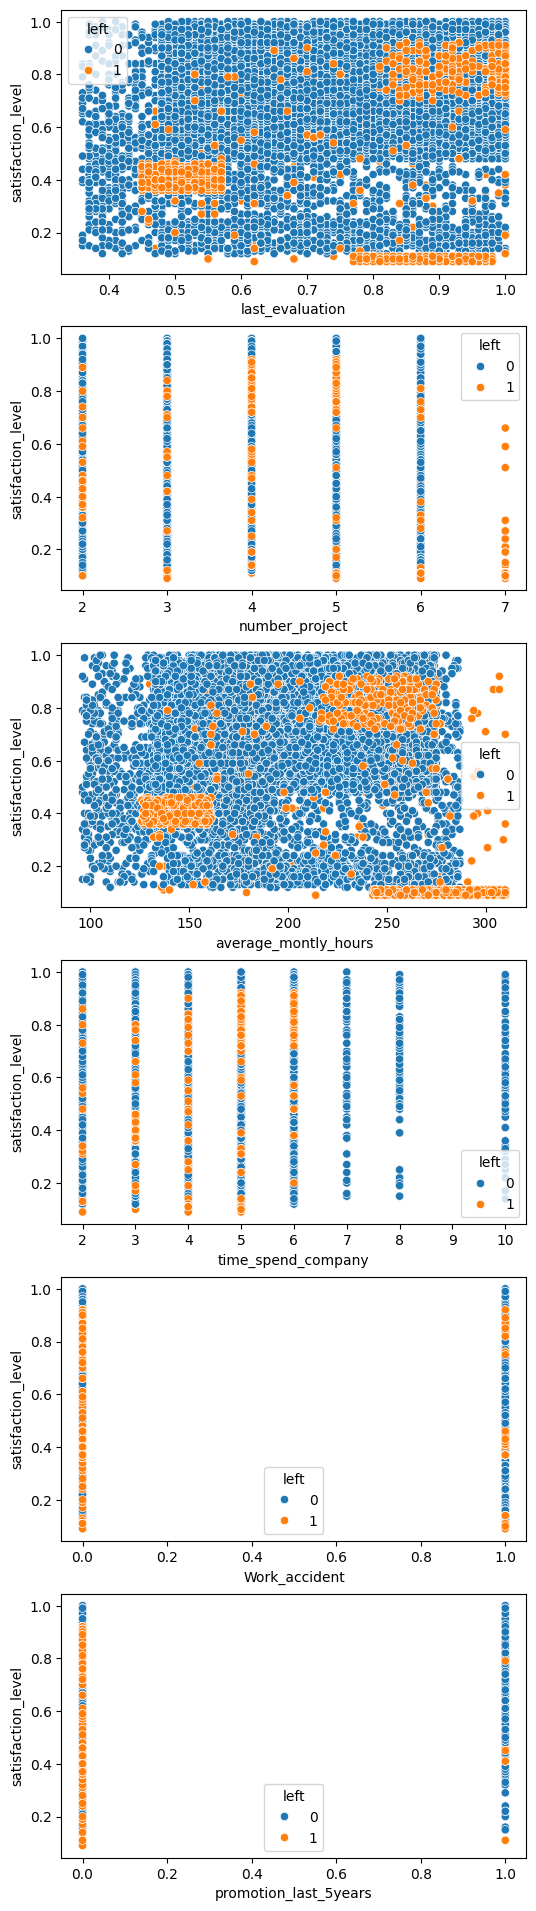

In [106]:
fig,axs = plt.subplots(6, figsize=(6, 24))
sns.scatterplot(x='last_evaluation', y='satisfaction_level' , hue='left', data = df , ax = axs[0])
sns.scatterplot(x='number_project', y='satisfaction_level' , hue='left', data = df , ax = axs[1])
sns.scatterplot(x='average_montly_hours', y='satisfaction_level' , hue='left', data = df , ax = axs[2])
sns.scatterplot(x='time_spend_company', y='satisfaction_level' , hue='left', data = df , ax = axs[3])
sns.scatterplot(x='Work_accident', y='satisfaction_level' , hue='left', data = df , ax = axs[4])
sns.scatterplot(x='promotion_last_5years', y='satisfaction_level' , hue='left', data = df , ax = axs[5])
plt.show()

###### **Pairwise Feature Relationships**

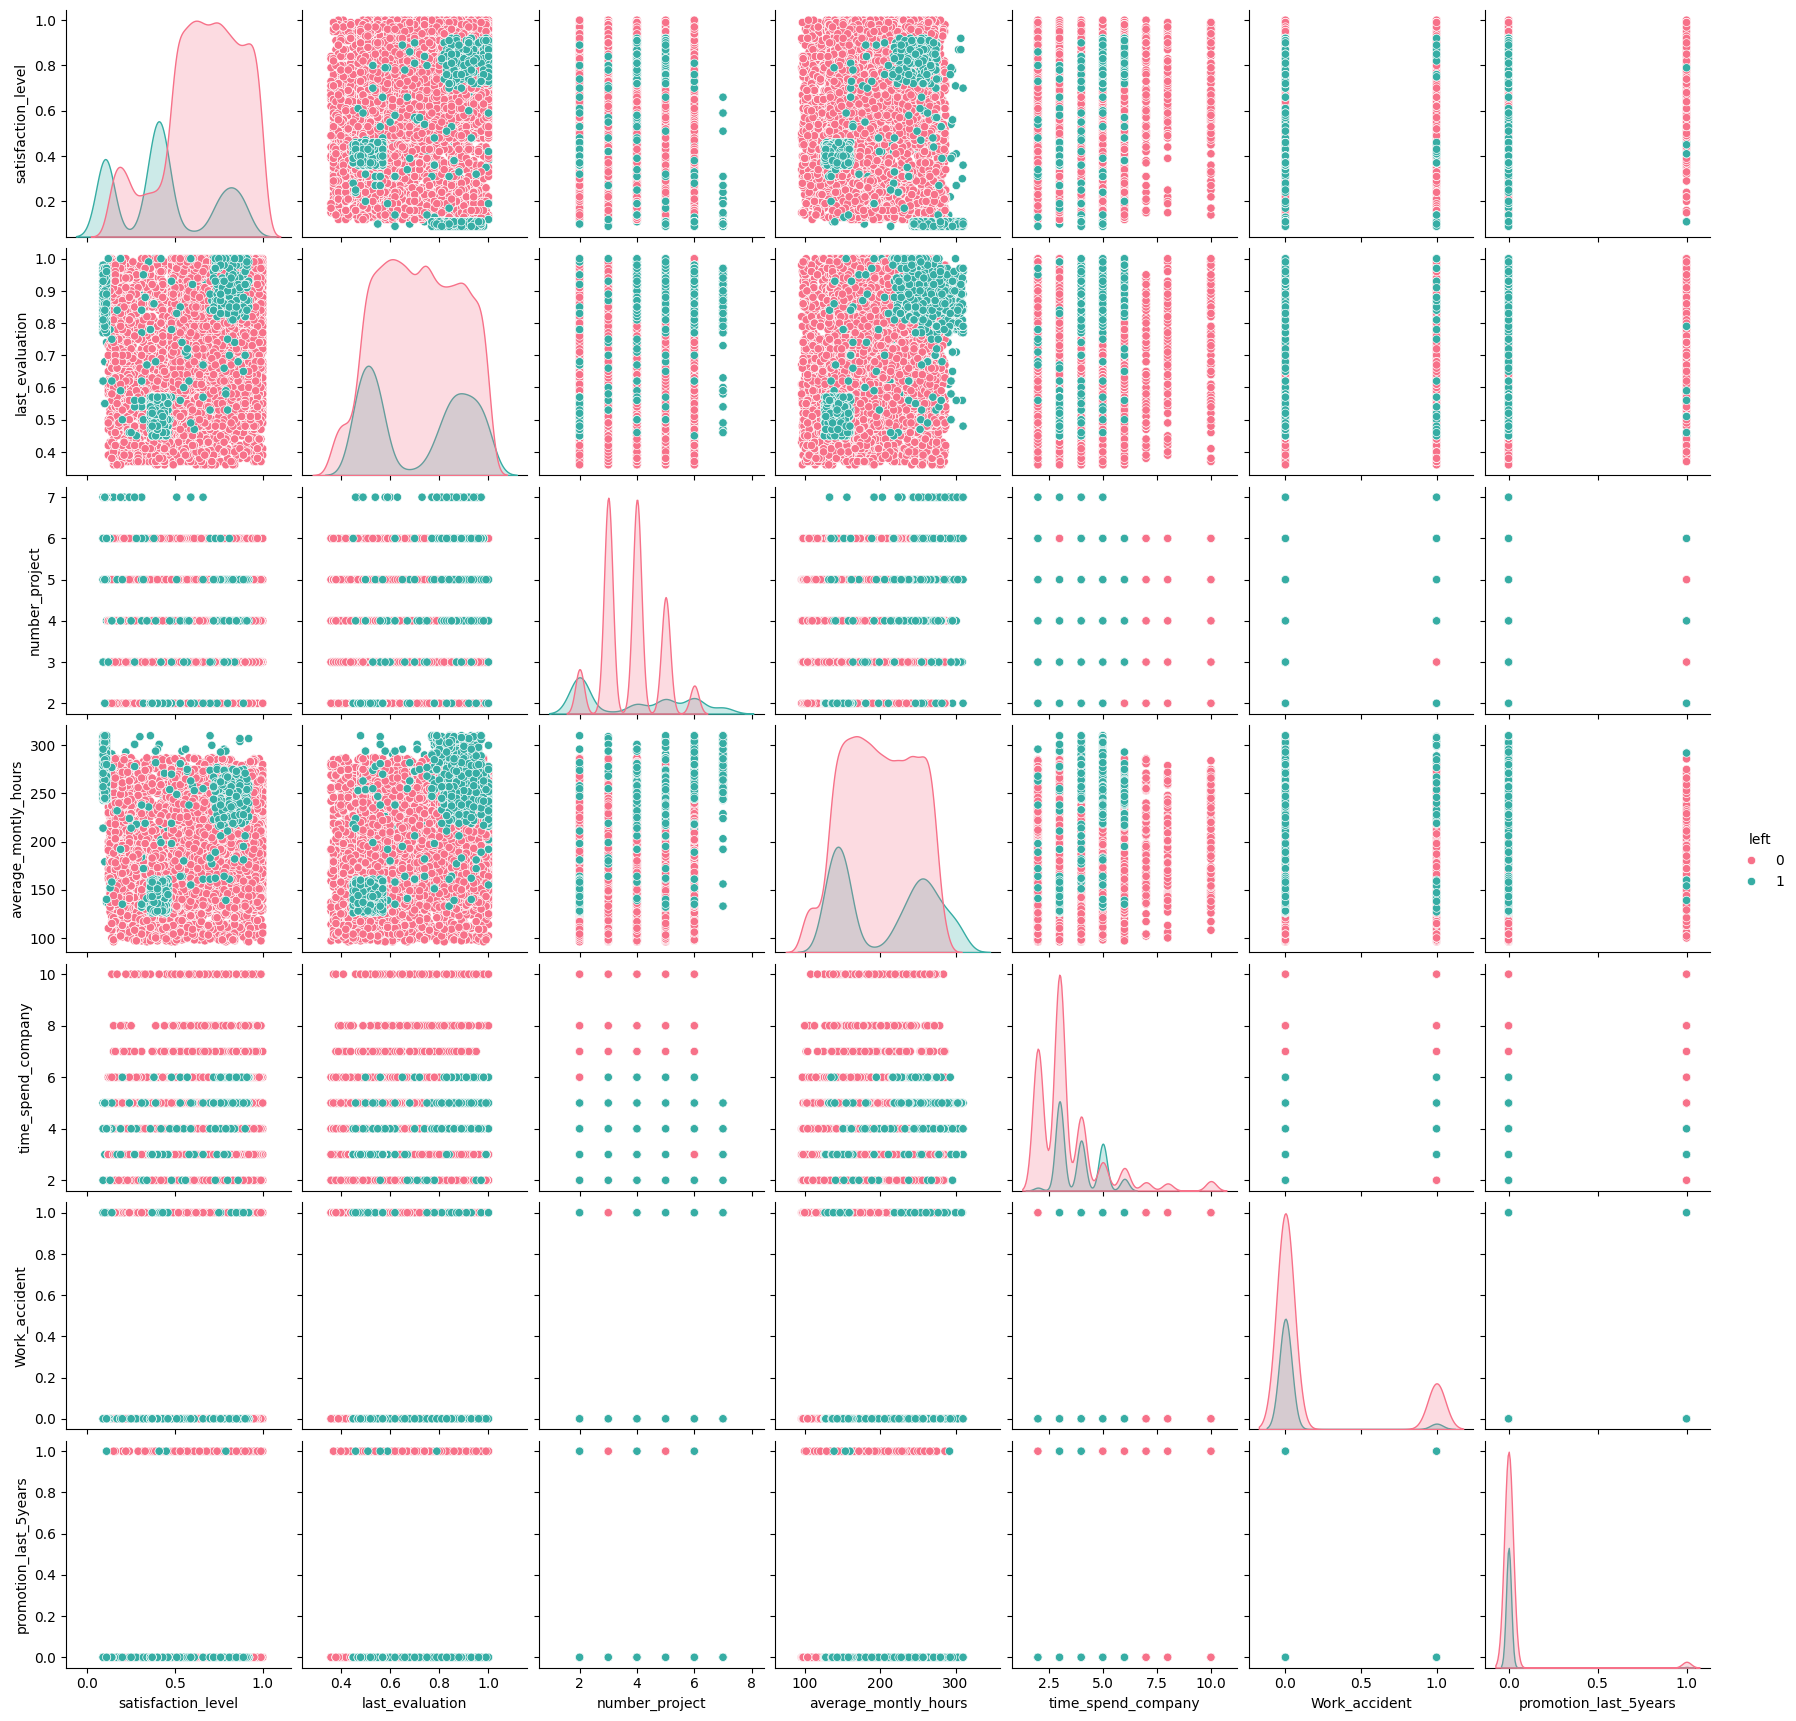

In [107]:
sns.pairplot(df,hue="left",palette="husl")
plt.show()

###### **Data Preprocessing**

###### **Encoding Categorical Variables**

In [108]:
df_encoded = pd.get_dummies(df, columns=['sales'], drop_first=True)

In [109]:
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,low,False,False,False,False,False,False,False,True,False


###### **Encoding Salary Levels**

In [110]:
df_encoded['salary'] = df_encoded['salary'].map({
    'low': 1,
    'medium': 2,
    'high': 3
})

In [113]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,1,0,2,False,False,False,False,False,False,True,False,False
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,1,0,1,False,False,False,False,False,False,True,False,False
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,1,0,1,False,False,False,False,False,False,True,False,False


###### **Feature Scaling**

In [114]:
numerical_features = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
]

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [115]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,1,0,2,False,False,False,False,False,False,True,False,False
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,1,0,1,False,False,False,False,False,False,True,False,False
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,1,0,1,False,False,False,False,False,False,True,False,False


###### **Converting Boolean Features to Numeric**

In [116]:
boolean_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[boolean_cols] = df_encoded[boolean_cols].astype(int)

In [117]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,1,0,2,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,1,0,1,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,1,0,1,0,0,0,0,0,0,1,0,0


###### **Feature Selection and Target Variable**

In [118]:
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

###### **Logistic Regression Model Training**

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

###### **Model Evaluation**

In [121]:
y_predict = model.predict(X_test)

###### **Accuracy Score**

In [122]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7893333333333333


###### **Confusion Matrix**

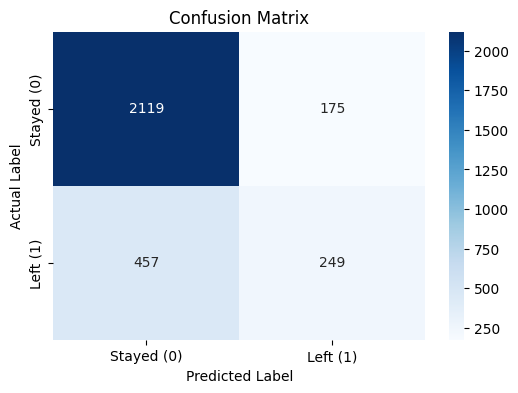

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Stayed (0)', 'Left (1)'],
    yticklabels=['Stayed (0)', 'Left (1)']
)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
